In [6]:
import pandas as pd
import numpy as np
import pylab as plt
%matplotlib inline
import seaborn as sns

In [11]:
df = pd.DataFrame.from_csv('atus_00005.csv')
df['weighted_sleep']=df.BLS_PCARE_SLEEP * df.WT06
df.EMPSTAT.astype('category')
df['SEX'] = df['SEX'].replace([1, 2], ['Male', 'Female'])
df.SEX.astype('category')
df.AGE = pd.cut(df.AGE, [15, 20, 25, 35, 45, 55, 65, 90], right = 'False')


In [106]:
grouped = df.groupby(['AGE','METAREA'] )
#num_LA_NY=grouped.size().unstack(0).loc[[7360,4481, 5601]]
results = grouped.weighted_sleep.sum() / grouped.WT06.sum()
results = results.unstack(0)/60
#results = results/60
la_ny_sleep = results.loc[[7601,7360,4481, 5601,1121,8841]]
la_ny_sleep = la_ny_sleep.rename(index={7601:"Seattle Metro",7360:"SF Metro",4481:"LA Metro", 5601: "NY Metro",1121:"Boston",8841:"DC Metro"})
la_ny_sleep = la_ny_sleep.stack(0).unstack(1)
la_ny_sleep
results

AGE,"(15, 20]","(20, 25]","(25, 35]","(35, 45]","(45, 55]","(55, 65]","(65, 90]"
METAREA,,,,,,,
0,9.482273,8.941251,8.584890,8.415547,8.348187,8.457993,8.990637
460,9.170718,8.106406,8.634777,8.276382,7.556663,8.020895,8.488110
1121,9.678877,8.960319,8.659566,8.178148,8.274333,8.291240,8.671992
1160,9.820321,9.302777,8.616672,8.458268,8.173166,8.389657,8.810364
1601,9.306586,8.613958,8.355207,8.395427,8.280591,8.169493,8.737245
1641,8.655158,8.616259,8.349674,9.014858,7.474789,9.594782,9.015124
1681,8.849451,9.173501,8.427605,8.522072,8.129321,7.855105,8.688364
1921,11.918632,9.603144,8.985598,9.220487,8.210091,8.748026,9.113024
2000,7.935678,9.873552,9.037837,8.613428,8.105259,8.422106,8.644529


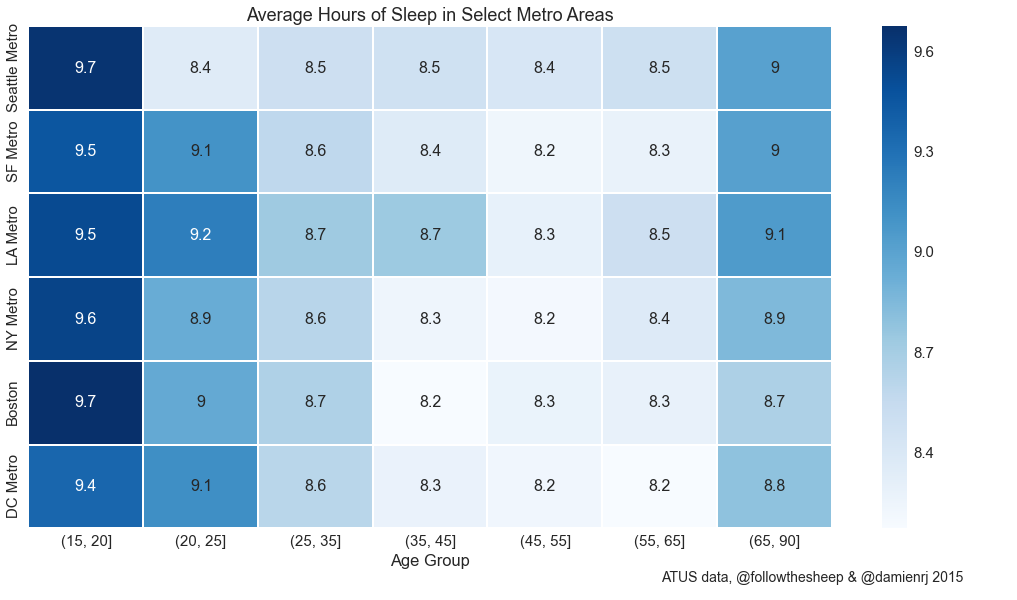

In [109]:

plt.figure(figsize=(18,9))
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
sns.heatmap(la_ny_sleep,annot=True,cmap="Blues",annot_kws={'fontsize':16})
plt.title("Average Hours of Sleep in Select Metro Areas")
plt.xlabel("Age Group")
plt.ylabel("")
plt.annotate('ATUS data, @quantumpenguin & @damienrj 2015',(.65,0.03),xycoords='figure fraction',fontsize=14)

In [91]:
sns.heatmap?


In [104]:
df.keys

<bound method DataFrame.keys of                 YEAR  STATEFIP  METAREA  PERNUM  LINENO             WT06  \
CASEID                                                                     
20050101050006  2005         5        0       1       1  12064433.005995   
20050101050012  2005         6     4481       1       1   5434077.134477   
20050101050020  2005         6        0       1       1  15341381.020262   
20050101050040  2005        17     1601       1       1   3110324.079004   
20050101050043  2005        17     1601       1       1   8828105.543941   
20050101050049  2005        17        0       1       1   4402799.746485   
20050101050051  2005        17     1601       1       1  13347375.495783   
20050101050062  2005        22        0       1       1   6857421.687045   
20050101050098  2005        36     5601       1       1   3867232.121202   
20050101050113  2005        39     1681       1       1  14191442.627191   
20050101050115  2005        39        0       1       1 